# Ticket 2: Visualización básica de señales

En este notebook se realiza una inspección visual de los datos de EEG cargados desde el archivo `v1p.mat`. Los datos fueron adquiridos con el sistema EEG según el estándar 10-20, con 19 canales (Fz, Cz, Pz, C3, T3, C4, T4, Fp1, Fp2, F3, F4, F7, F8, P3, P4, T5, T6, O1, O2) a 128 Hz. Los electrodos A1 y A2 fueron usados como referencia.

Se generarán gráficos que muestran la señal en el tiempo para un canal individual, gráficos de múltiples canales superpuestos y un histograma para analizar la distribución de la amplitud de un canal.

In [1]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Configurar Matplotlib para que se muestren los gráficos en línea (en Jupyter/Colab)
%matplotlib inline

print('Entorno configurado y librerías importadas correctamente.')

Entorno configurado y librerías importadas correctamente.


In [2]:
# Cargar el archivo v1p.mat
mat_data = loadmat('v1p.mat', squeeze_me=True)

# Verificar las llaves disponibles en el archivo
print('Llaves en el archivo .mat:', mat_data.keys())

# Extraer la variable 'v1p'
data_array = mat_data['v1p']

print('Forma del array:', data_array.shape)
print('Tipo de datos:', data_array.dtype)

Llaves en el archivo .mat: dict_keys(['__header__', '__version__', '__globals__', 'v1p'])
Forma del array: (12258, 19)
Tipo de datos: int16


In [3]:
# Convertir la matriz en un DataFrame de pandas
df = pd.DataFrame(data_array)

# Asignar nombres de columnas correspondientes a cada canal de EEG
channel_names = ['Fz', 'Cz', 'Pz', 'C3', 'T3', 'C4', 'T4', 'Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'P3', 'P4', 'T5', 'T6', 'O1', 'O2']

if df.shape[1] == len(channel_names):
    df.columns = channel_names
else:
    print('Advertencia: El número de columnas en el dataset no coincide con el número de canales esperados.')

print('Primeras 5 filas del DataFrame:')
print(df.head())

Primeras 5 filas del DataFrame:
    Fz   Cz   Pz   C3   T3   C4   T4  Fp1  Fp2    F3   F4   F7   F8   P3   P4  \
0   85 -407  200  191  420  457  310  310   16  1009  531  126  457  200  457   
1 -266  -55  -20  367  163  384  -20  310  494  1193  494  236  236  310  200   
2  -90  -19  126  437  420  568  347  457 -131  1156  384  384  494  384  494   
3  -90 -160  163  473  384  494  310  384  457  1340  494  420  310  420  273   
4 -301 -336  -20  473  200  531   89  420  200  1156  310  494  273  457  236   

    T5   T6   O1   O2  
0  384  -90  473  121  
1  457 -195  543   15  
2  531  -19  613  261  
3  531  -90  437  -19  
4  568 -160  578  121  


In [4]:
# Crear un eje temporal basado en la frecuencia de muestreo de 128 Hz
# Suponemos que cada fila corresponde a una muestra consecutiva
sampling_rate = 128  # Hz
num_samples = df.shape[0]
time_axis = np.arange(num_samples) / sampling_rate  # en segundos

print('Eje temporal creado con', num_samples, 'muestras y una duración total de', time_axis[-1], 'segundos.')

Eje temporal creado con 12258 muestras y una duración total de 95.7578125 segundos.


## Funciones para la Visualización de Señales

Se definen funciones para graficar:
- Un canal individual en el tiempo.
- Múltiples canales superpuestos.
- Un histograma para analizar la distribución de la señal de un canal.

In [5]:
def plot_single_channel(df, channel, time_axis):
    """Grafica la señal de un único canal en el tiempo."""
    plt.figure(figsize=(12, 4))
    plt.plot(time_axis, df[channel], label=channel)
    plt.title(f'Señal de {channel} en el tiempo')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_multiple_channels(df, channels, time_axis):
    """Grafica múltiples canales en el mismo gráfico para comparación."""
    plt.figure(figsize=(12, 6))
    for ch in channels:
        plt.plot(time_axis, df[ch], label=ch)
    plt.title('Señales EEG en el tiempo')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_histogram(df, channel):
    """Grafica el histograma de la señal de un canal."""
    plt.figure(figsize=(8, 4))
    plt.hist(df[channel], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de la señal de {channel}')
    plt.xlabel('Amplitud')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

## Visualización de un Canal Individual

Se grafica la señal del canal **Fz** en función del tiempo.

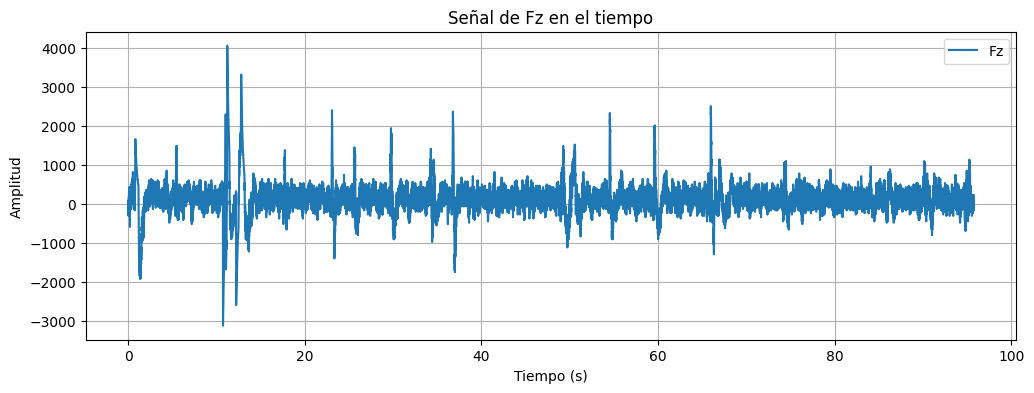

In [6]:
plot_single_channel(df, 'Fz', time_axis)

## Visualización de Múltiples Canales

Se grafican los canales **Fz**, **Cz** y **Pz** en un mismo gráfico para comparar sus señales.

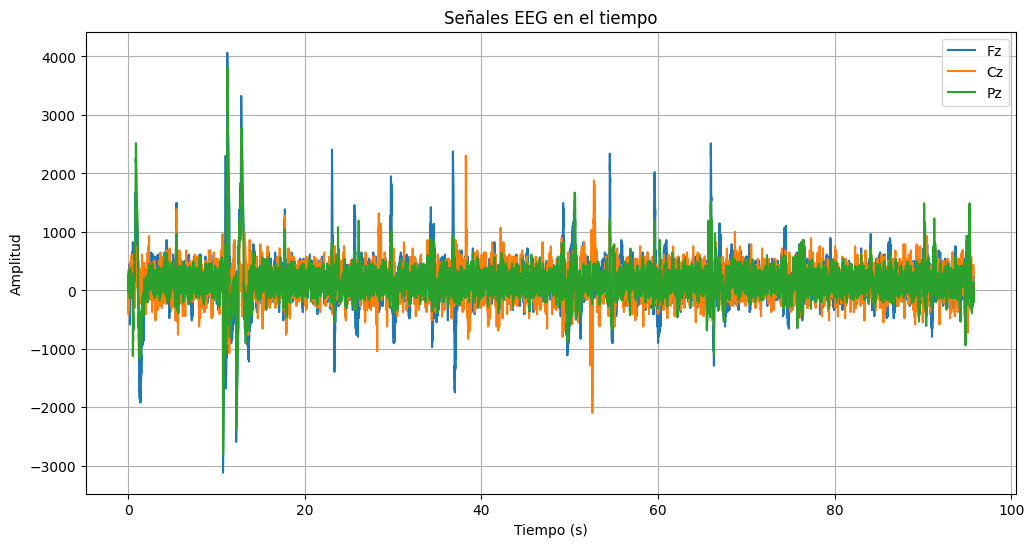

In [7]:
plot_multiple_channels(df, ['Fz', 'Cz', 'Pz'], time_axis)

## Histograma de Distribución de una Señal

Se genera un histograma para analizar la distribución de amplitudes del canal **Fz**.

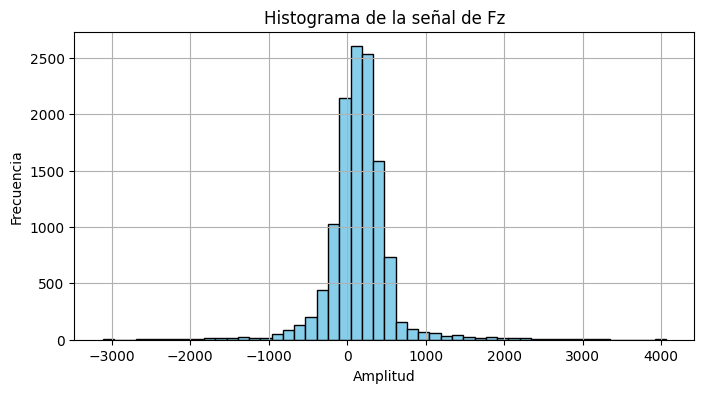

In [8]:
plot_histogram(df, 'Fz')

## Conclusiones e Interpretación

Los gráficos generados permiten observar la evolución de la señal EEG en el tiempo. En la gráfica de un canal individual se pueden identificar tendencias generales y posibles artefactos (picos o caídas abruptas) que podrían indicar interferencias o ruido. La comparación de múltiples canales en un mismo gráfico facilita la detección de patrones comunes o divergentes entre diferentes regiones cerebrales. Además, el histograma de distribución ofrece una visión de la dispersión y presencia de valores atípicos en la señal.

**Consejo Profesional:**
La visualización y el análisis exploratorio son pasos esenciales en la preparación de datos para inteligencia artificial. Un enfoque riguroso en esta etapa permite detectar artefactos y anomalías que, si no se corrigen, pueden afectar la precisión de los modelos. Mantén siempre una documentación clara y utiliza estas herramientas para profundizar en la interpretación de tus datos.